# Capstone Webscrapping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application

## background

At this project we try to scrap Sales Data of Ethereum from Coingecko website. As we know, Coingecko is the world's largest independent cryptocurrency data aggregator with over 13,000+ different cryptoassets tracked across more than 500+ exchanges worldwide. CoinGecko is the world’s largest independent source of reliable cryptocurrency data and is frequently cited across the industry by various publications. We will try to scrap this sites for educational and excercise only.

Some of you might ask why we need to scrap this data from official website while it already have a good visualisation. Let's say we have a project to know trading volume movement of Ethereum. The purpose of the project is to know how many Ethereum's volume month per month. To do that we need to have some datas which relate to our project. Scrapping is a good way to collect the data we don't have from public.

We will scrap 2 points from the websites. One is Date of sales since the beginning of January 2020 until the ending of June 2021. The other one is Volume which contains a lot of number of Ethereum's sales.

## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

In [2]:
import requests

url_get = requests.get('https://www.coingecko.com/en/coins/ethereum/historical_data/usd?start_date=2020-01-01&end_date=2021-06-30#panel')

To visualize what exactly you get from the `request.get`, we can use .content to see what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [3]:
url_get.content[1:500]

b'!DOCTYPE html>\n<html lang="en">\n<head>\n<script async defer src="https://www.googleoptimize.com/optimize.js?id=GTM-W3CD992"></script>\n<meta charset="utf-8">\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\n<meta name="viewport" content="width=device-width, initial-scale=1.0">\n<link rel="shortcut icon" href="/favicon.ico">\n<link type="application/opensearchdescription+xml" rel="search" href="/OpensearchDescription.xml" />\n<title>Ethereum USD Historical Data | CoinGecko</title>\n<meta name="de'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [4]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")

## Finding the right key to scrap the data & Extracting the right information

Find the key and put the key into the `.find()` Put all the exploring the right key at this cell. When we inspect element of page site, we can see the table that contains datas which we need. Then we can get the name of class. In this case, the name of class is **table table-striped text-sm text-lg-normal** in an HTML document.



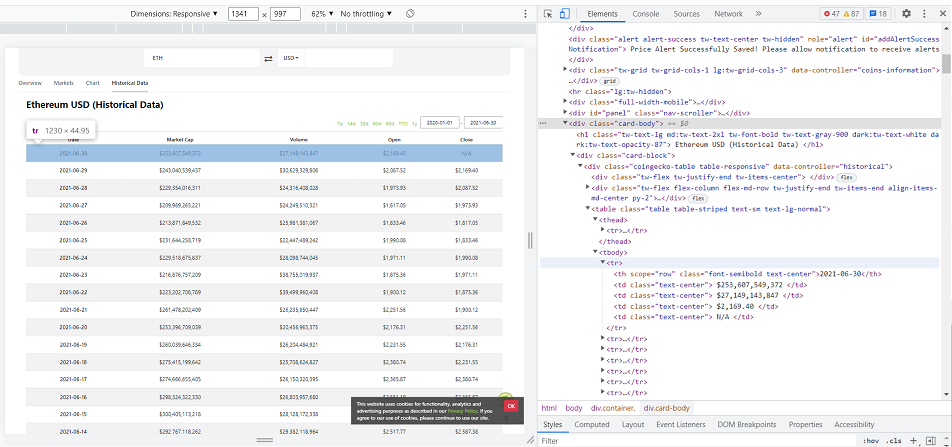

In [5]:
table = soup.find('table', attrs={'class':'table table-striped text-sm text-lg-normal'})
print(table.prettify()[1:500])

table class="table table-striped text-sm text-lg-normal">
 <thead>
  <tr>
   <th class="text-center">
    Date
   </th>
   <th class="text-center">
    Market Cap
   </th>
   <th class="text-center">
    Volume
   </th>
   <th class="text-center">
    Open
   </th>
   <th class="text-center">
    Close
   </th>
  </tr>
 </thead>
 <tbody>
  <tr>
   <th class="font-semibold text-center" scope="row">
    2021-06-30
   </th>
   <td class="text-center">
    $253,607,549,372
   </td>
   <td class="te


And if we look inside of **table table-striped text-sm text-lg-normal**, we can find `tbody` and `tr`. `tbody` is inside of the table and `tr` is inside of `tbody`. If we want to get data row per row, we can count how many rows of datas. We count it from the length of `tr` because one `tr` contains *date, marketcap, volume, open, close* data. It is easily styled by using the class or id attribute. 
    
The `find()` function can help us to get the part of the html code that we needed. While most of the html is contained in `tr` we can differsiate them with help of `attrs=`, we can insert anything that in the `tr` a the attrs to help us find the part we needed. 

Now, we need to get 2 informations, that is the date and the volume. Which we can read from above code, date is contained within `th` with "font-semibold text-center", volume is contained within `td` with "text-center". 

Finding row length.

In [6]:
row = table.find_all('th', attrs={'class':'font-semibold text-center'})
row_length = len(row)

Do the scrapping process here. The scrapping process will start from getting *date* within `th` tag. And then we continue to get *volume* within `td` tag. We do looping by `tr` tag because it was read as a row and save it into a tuple.

In [7]:
temp = [] #initiating a tuple

for row in table.tbody.find_all('tr'): 

    #scrapping process
    date_column = row.find_all('th')
    columns = row.find_all('td')
    
    #condition to check `td` per `td` in a `tr` tag
    if(columns != []):
        date = date_column[0].text.strip()
        volume = columns[1].text.strip()
        
        temp.append((date,volume))
    
temp 

[('2021-06-30', '$27,149,143,847'),
 ('2021-06-29', '$30,629,329,806'),
 ('2021-06-28', '$24,316,408,028'),
 ('2021-06-27', '$24,249,510,321'),
 ('2021-06-26', '$25,981,381,067'),
 ('2021-06-25', '$22,447,489,242'),
 ('2021-06-24', '$28,098,744,045'),
 ('2021-06-23', '$38,755,019,937'),
 ('2021-06-22', '$39,499,960,408'),
 ('2021-06-21', '$26,235,850,447'),
 ('2021-06-20', '$20,456,963,375'),
 ('2021-06-19', '$26,204,484,921'),
 ('2021-06-18', '$25,708,624,827'),
 ('2021-06-17', '$26,150,320,395'),
 ('2021-06-16', '$26,803,957,680'),
 ('2021-06-15', '$28,128,172,338'),
 ('2021-06-14', '$29,382,118,964'),
 ('2021-06-13', '$28,235,882,062'),
 ('2021-06-12', '$26,751,786,966'),
 ('2021-06-11', '$33,075,957,437'),
 ('2021-06-10', '$43,973,432,438'),
 ('2021-06-09', '$48,344,195,674'),
 ('2021-06-08', '$37,385,872,210'),
 ('2021-06-07', '$29,050,162,249'),
 ('2021-06-06', '$34,731,979,705'),
 ('2021-06-05', '$39,996,583,175'),
 ('2021-06-04', '$38,104,663,185'),
 ('2021-06-03', '$39,148,856

## Creating data frame & Data wrangling

Put the array into dataframe

But, before of the process, we can reverse our list. We can use `::-1` to do that. 

In [8]:
temp = temp[::-1]

In [9]:
import pandas as pd

df = pd.DataFrame(temp, columns = ('date','volume'))
df.head()

,date,volume
0,2020-01-01,"$7,103,187,151"
1,2020-01-02,"$6,623,732,041"
2,2020-01-03,"$6,497,297,884"
3,2020-01-04,"$9,655,245,100"
4,2020-01-05,"$6,958,393,690"


Do the data cleaning here. If we check the types of each columns in dataframe, we use `.dtypes`

In [10]:
df.dtypes

date      object
volume    object
dtype: object

The steps to do data cleaning are deleting character `$` and `,` in column volume, and changing datatype of date and volume.

In [11]:
df['volume'] = df['volume'].str.replace("$","",regex=True)
df['volume'] = df['volume'].str.replace(",","",regex=True)
df['volume'] = df['volume'].astype('int64')
df['date'] = df['date'].astype('datetime64')

But, one of important thing in cleaning data and wrangling data is don't forget to change index of dataframe. To make our plot behave like we want, we need to set our index of our dataframe to our date column. We can use `set_index()`

In [12]:
df = df.set_index('date')

After cleaning data, we get result of dataframe. And it is ready to next step.

In [13]:
df

,volume
date,
2020-01-01,7103187151
2020-01-02,6623732041
2020-01-03,6497297884
2020-01-04,9655245100
2020-01-05,6958393690
...,...
2021-06-26,25981381067
2021-06-27,24249510321
2021-06-28,24316408028


Data visualisation.
Now we are ready to visualize the dataframe. The purpose of visualization is that user or client or everyone who needs to know the 
trading volume movement of Ethereum since first month of 2020 until June of 2021.

We use `.plot()` to visualize as a chart. 

<AxesSubplot:xlabel='date'>

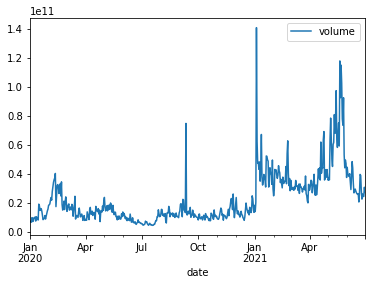

In [17]:
df.plot()

### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

## Finishing This Notebook with Your Analysis and Conclusion

First you can do start with making the data visualisation. 

<AxesSubplot:xlabel='date'>

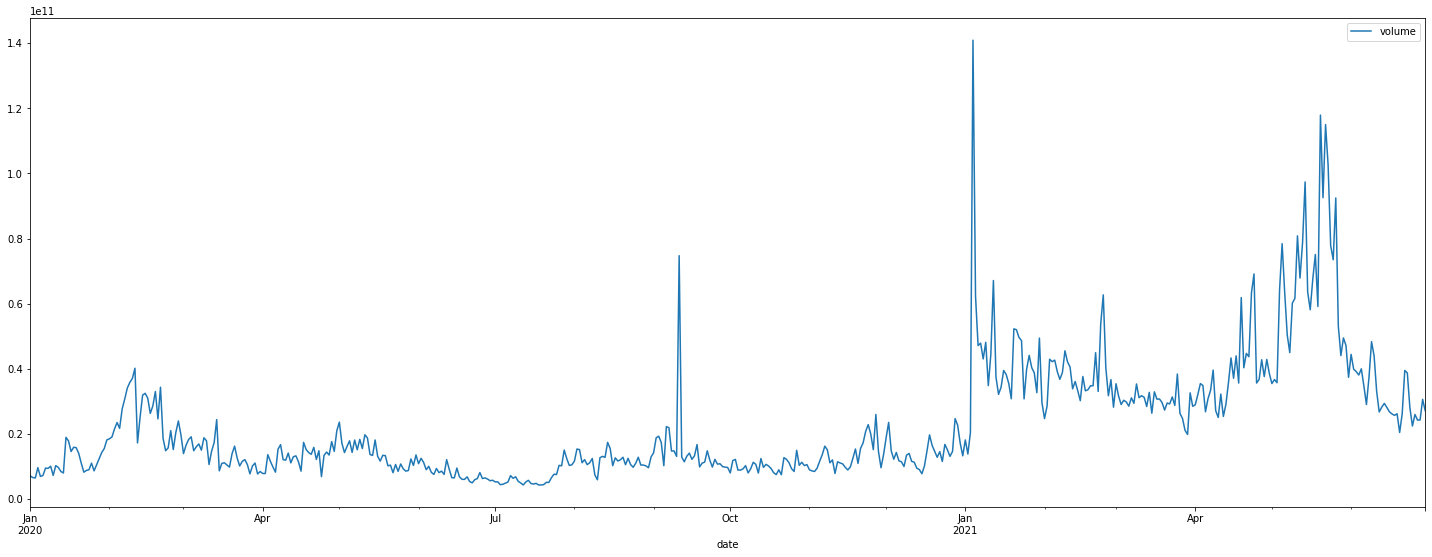

In [18]:
df.plot(figsize = (25,9))

### Insight / Knowledge
*by Ruth Hanseliani*

This project actually is a practice for us to do simple scrappping until we get the plot or chart to get more information or to make some decisions as bussiness.
I imagine that i am a trader or user that want to do trading Ethereum.
Basically, by knowing the volume of Ethereum in range of dates like January 2020 until June 2021 can be a way to start my decision to do trading. From that result of scrapping and plotting, i can see how the volumes movement of Ethereum. Some insights that i get from the chart are :
- In the January 2021, there was some of dates which **the highest of volume Ethereum**. The chart or amount of number in volume column couldn't tell me what happened in that time. But, inside of that i can find by myself if there was some issues in that time by searching on Internet. So, it can be new information for me to know more of this Ethereum.

- I can see in range of dates from January 2020 until Januari 2021, **there was no more significant volume increasing**. The volumes is under 6000000000. But some of days in September 2021 the volume are above 6000000000.

- Volumes Ethereum in the beginning of 2021 until the middle of 2021 are higher or are bigger than the long year of 2020. I could think if *in 2020 when the pandemic started people didn't do much trading.*

- I'm not pretty sure if i could do some forecasting to know the movement of this Ethereum because the chart only provided the volume movement. Maybe if the chart more complete such as there are open price, close price, high price data, i can do little forecasting by seeing the chart. 




### Extra Challange

This will be not included to the scoring. 

- You can create additional analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.